In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import pickle

# Load the dataset
df = pd.read_csv('resolution_data.csv')

# Check first 5 rows
print("Dataset Head:")
display(df.head())

# Check info for missing values
print("\nDataset Info:")
print(df.info())


Dataset Head:


,Gender,Age,Resolution_Type,Relationship_Status,Attendance_Perc,Stress_Level,Willpower,Laziness,Social_Media,Friends,Distance,Days_Lasted
0,0,21,Read More Books,1,32,10,5,10,3.8,0,1.7,0
1,1,21,Learn Coding,2,24,7,9,7,2.1,1,4.5,0
2,0,19,Start a Business,2,35,5,5,6,5.7,0,12.5,5
3,0,22,Start a Business,0,39,9,2,9,11.2,1,8.8,5
4,0,18,Healthy Diet,1,61,1,5,10,2.1,2,13.3,0



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Gender               15000 non-null  int64  
 1   Age                  15000 non-null  int64  
 2   Resolution_Type      15000 non-null  object 
 3   Relationship_Status  15000 non-null  int64  
 4   Attendance_Perc      15000 non-null  int64  
 5   Stress_Level         15000 non-null  int64  
 6   Willpower            15000 non-null  int64  
 7   Laziness             15000 non-null  int64  
 8   Social_Media         15000 non-null  float64
 9   Friends              15000 non-null  int64  
 10  Distance             15000 non-null  float64
 11  Days_Lasted          15000 non-null  int64  
dtypes: float64(2), int64(9), object(1)
memory usage: 1.4+ MB
None


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import pickle

# Load the new big dataset
df = pd.read_csv('resolution_data.csv')

# --- STEP 1: Encode 'Gender' (Male=1, Female=0) ---
# Previous code mein hum drop kar rahe the, ab hum USE karenge.
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})

# --- STEP 2: Encode 'Resolution_Type' ---
mapping = {
    'Gym/Fitness': 0,
    'Learn Coding': 1,
    'Save Money': 2,
    'Quit Smoking': 3,
    'Read More Books': 4,
    'Healthy Diet': 5,
    'Find a Relationship': 6,
    'Start a Business': 7,
    'Stop Procrastination': 8,
    'Academic Comeback': 9,
    'Stop Stalking Ex': 10
}

df['Resolution_Type'] = df['Resolution_Type'].map(mapping)

# Check if everything is numeric now
print("Data after encoding (Gender & Resolutions should be numbers):")
display(df.head())

Data after encoding (Gender & Resolutions should be numbers):


,Gender,Age,Resolution_Type,Relationship_Status,Attendance_Perc,Stress_Level,Willpower,Laziness,Social_Media,Friends,Distance,Days_Lasted
0,NaN,21,4,1,32,10,5,10,3.8,0,1.7,0
1,NaN,21,1,2,24,7,9,7,2.1,1,4.5,0
2,NaN,19,7,2,35,5,5,6,5.7,0,12.5,5
3,NaN,22,7,0,39,9,2,9,11.2,1,8.8,5
4,NaN,18,5,1,61,1,5,10,2.1,2,13.3,0


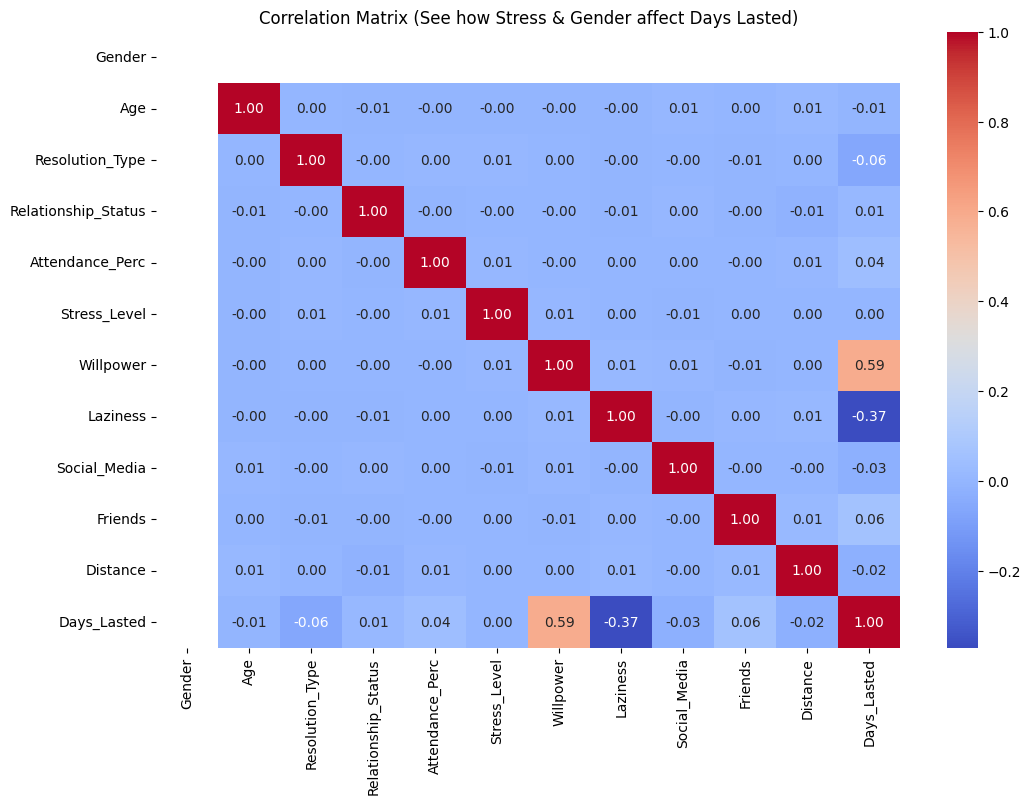

In [9]:
# Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix (See how Stress & Gender affect Days Lasted)")
plt.show()

In [10]:
# Features (X) aur Target (y)
X = df.drop(columns=['Days_Lasted'])
y = df['Days_Lasted']

# Double Check Feature Order (Must match app.py!)
# Order should be: Gender, Age, Resolution_Type, Relationship_Status, Attendance_Perc, Stress_Level, Willpower, Laziness, Social_Media, Friends, Distance
print("Features used for training:", X.columns.tolist())

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

print("✅ Model Training Complete!")

# Evaluate
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae:.2f} days") 
print(f"Accuracy (R2 Score): {score:.2f}")

# Save the updated model
with open('resolution_model.pkl', 'wb') as f:
    pickle.dump(model, f)

print("✅ New 'resolution_model.pkl' saved with Gender & Stress features!")

Features used for training: ['Gender', 'Age', 'Resolution_Type', 'Relationship_Status', 'Attendance_Perc', 'Stress_Level', 'Willpower', 'Laziness', 'Social_Media', 'Friends', 'Distance']
✅ Model Training Complete!
Mean Absolute Error: 1.86 days
Accuracy (R2 Score): 0.95
✅ New 'resolution_model.pkl' saved with Gender & Stress features!


In [11]:
# Prediction on Test Data
y_pred = model.predict(X_test)

# Accuracy Check (R2 Score and Error)
mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae:.2f} days") 
print(f"R2 Score (Accuracy): {score:.2f}")

# Example Prediction
print("\nTest Prediction:")
print(f"Actual Days: {y_test.iloc[0]}, Predicted Days: {y_pred[0]:.1f}")


Mean Absolute Error: 1.86 days
R2 Score (Accuracy): 0.95

Test Prediction:
Actual Days: 0, Predicted Days: 0.1


In [12]:
# Save the model
with open('resolution_model.pkl', 'wb') as f:
    pickle.dump(model, f)

print("✅ Model saved as 'resolution_model.pkl'. Ready for Web App!")


✅ Model saved as 'resolution_model.pkl'. Ready for Web App!
